In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import r2_score

In [3]:
%matplotlib notebook

# KNN regressor implementation

In [4]:
def std_normalize(X: np.ndarray) -> tuple:
    """
    Standard normalization
    
    Performs standard normalization (e.g. (X - mean(X)) / std(X)) and returns parameters 
    of normalization
    
    Args:
        X: array of shape (m, n), where m - number of samples,
            n - number of features
    
    Returns:
        (X_norm, mu, sigma): tuple of normalized X, mean and standard deviation of X
    """
    mu = np.mean(X)
    sigma = np.std(X)
    return ((X - mu)/sigma, mu, sigma)

In [5]:
def find_norms(X: np.ndarray, point: np.ndarray) -> np.ndarray:
    """
    Returns norms for difference between each row of X and given point
    """
    return np.linalg.norm(X - point, axis=1)

In [6]:
def find_closest_idx(X, point, k):
    """
    Returns indexes of rows in X which are in k closest to point
    """
    norms = find_norms(X, point)
    return np.argpartition(norms, k - 1)[:k]

In [7]:
class KNNRegressor:
    """
    Implementation of KNN regressor
    """
    def __init__(self, k: int):
        """
        Creates instance of KNNRegressor
        
        Args:
            k: number of neighbours to use
        """
        self.k = k
    
    def fit(self, X_train: np.ndarray, y_train: np.ndarray):
        """
        Train regressor on given dataset
        
        Saves normalized version of X_train and y_train
        
        Args:
            X_train: array of shape (m, n), where m - number
                of samples, n - number of features
            y_train: array of shape (m, 1)
        """
        self.X_train, self.mu, self.std = std_normalize(X_train)
        self.y_train = y_train
    
    def predict(self, X_test: np.ndarray) -> np.ndarray:
        """
        Predicts value for each row in X_test
        
        Args:
            X_test: array of shape (m, n), where m - number of samples,
                n - number of features; each row corresponds to single observation
        
        Returns:
            y_test: array of shape (m, 1), each row corresponds to single prediction
        """
        X_test_normalized = (X_test - self.mu)/self.std
        
        def predict_single(point: np.array) -> float:
            """
            Helper function, that predicts y for single observation
            """
            closest_idx = find_closest_idx(self.X_train, point, self.k)
            values = self.y_train[closest_idx]
            return np.mean(values)

        return np.apply_along_axis(predict_single, arr=X_test_normalized, axis=1)

# Boston Housing dataset

In [8]:
boston_data = load_boston()
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
# create dataframe of dataset
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['MEDV'] = boston_data.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.RM.values.reshape(-1, 1), df.MEDV.values.reshape(-1, 1), random_state=0)

# Visualize KNN regression

<IPython.core.display.Javascript object>


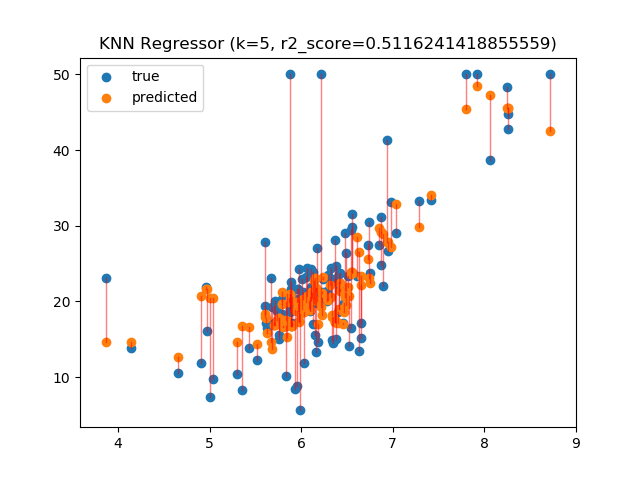

<IPython.core.display.Javascript object>


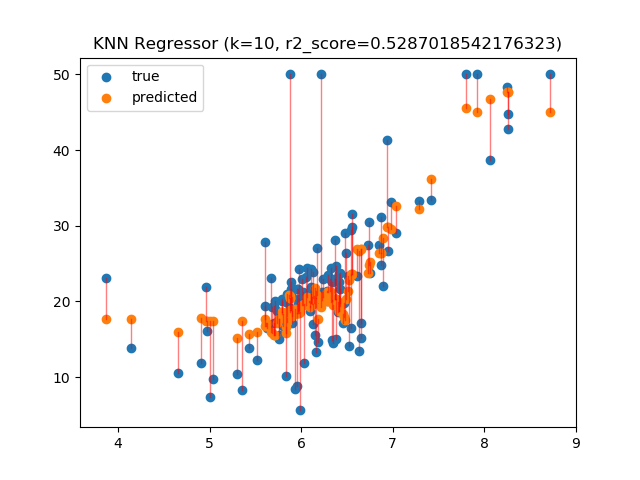

<IPython.core.display.Javascript object>


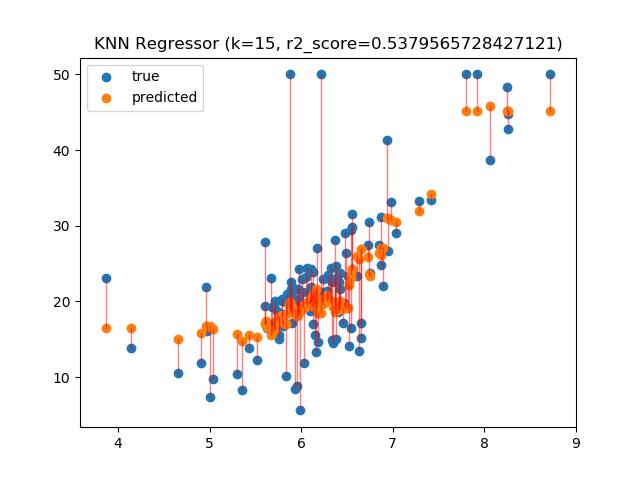

<IPython.core.display.Javascript object>


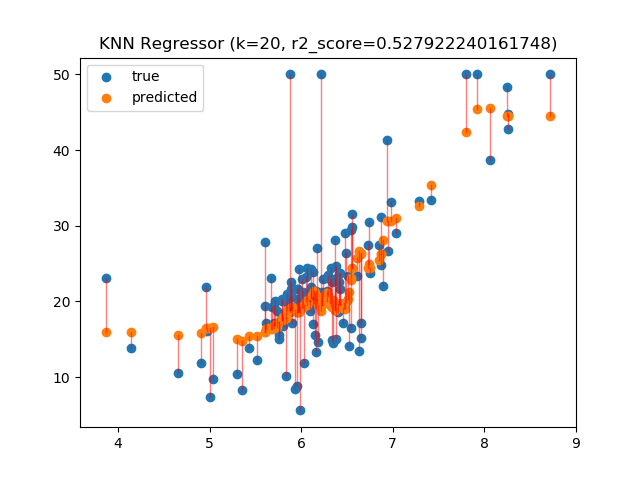

In [11]:
r2_test_scores = [] # store r2 score for test set
r2_train_scores = [] # store r2 score for training set
for k in range(1, 22):
    # train and evaluate model
    knn_regressor = KNNRegressor(k)
    knn_regressor.fit(X_train, y_train)
    pred =  knn_regressor.predict(X_test)
    r2 = r2_score(y_test, pred)
    r2_train = r2_score(y_train, knn_regressor.predict(X_train))
    r2_test_scores.append(r2)    
    r2_train_scores.append(r2_train)

    show_plot = k % 5 == 0
    if show_plot:
        plt.figure()
        # plot predicted and true values
        plt.scatter(X_test, y_test, label='true')
        plt.scatter(X_test, pred, label='predicted')
        err = y_test-pred
        plt.legend()
        # plot difference between predicted and true values
        for x_e, y_e, z_e in zip(X_test, y_test, pred):
            plt.plot([x_e, x_e], [y_e, z_e], '-', c= 'r', linewidth=1, alpha=0.5)
        plt.title("KNN Regressor (k={}, r2_score={})".format(k, r2))
        plt.show()

<IPython.core.display.Javascript object>


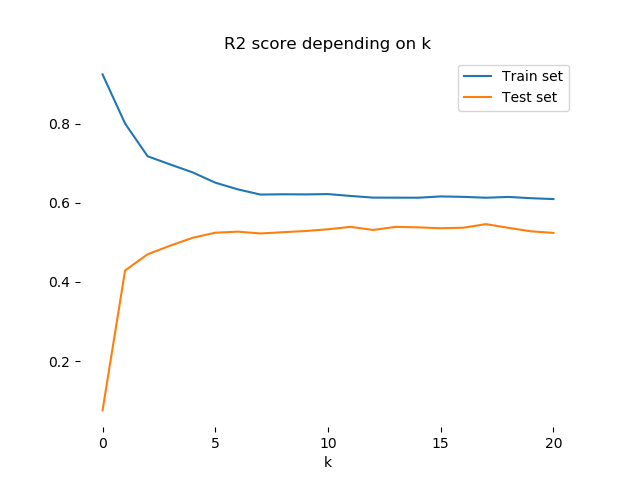

In [12]:
# show how r2 score changes depending on k 
# for both training and test sets
plt.figure()
plt.plot(r2_train_scores, label='Train set')
plt.plot(r2_test_scores, label='Test set')
plt.legend()
plt.title('R2 score depending on k')
plt.xlabel('k')
plt.xticks(np.linspace(0, 20, 5))
plt.yticks(np.linspace(0, 1, 6)[1:-1])
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()